# Solos in the *Weimar Jazz Database*

**Disclaimer: I am not the expert here!**

In this session, we will have a look at is the [*Jazzomat Research Project*](https://jazzomat.hfm-weimar.de/) that contains the *Weimar Jazz Database* (WJazzD).
Let us first browse the site.

One of the outcomes of this research project is the freely-available book:

* Pfleiderer, M., Frieler, K., Abeßer, J., Zaddach, W.-G., & Burkhard, B. (Eds.) (2017). Inside the Jazzomat. New Perspectives for Jazz Research. Mainz: Schott Campus ([Open Access](https://schott-campus.com/jazzomat/)).

In [85]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sqlite3

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
sns.set_context("talk")

The WJazzD can be downloaded at https://jazzomat.hfm-weimar.de/download/download.html 
A local copy of the database is stored at `data/wjazz.db`. We use the `sqlite3` library to connect to this database.

In [2]:
conn = sqlite3.connect("data/wjazzd.db")

In [3]:
conn

We can now use `pandas` to read the data out of the database.

In [4]:
solos = pd.read_sql("SELECT * FROM melody", con=conn)

The `"SELECT * FROM melody"` means "Select everything from the table 'melody' in the database". Let's look at the first ten entries. 

Likewise, we can select the `composition_info` table that contains a lot of metadata for the solos:

In [6]:
solos_meta = pd.read_sql("SELECT * from solo_info", con=conn)

The `.shape` attribute shows us how many solos are in the database.

In [18]:
solos_meta.shape

(456, 17)

The `.sample()` method draws a number of rows at random from a DataFrame.

In [8]:
solos_meta.sample(10)

,melid,trackid,compid,recordid,performer,title,titleaddon,solopart,instrument,style,avgtempo,tempoclass,rhythmfeel,key,signature,chord_changes,chorus_count
170,171,150,135,74,George Coleman,Maiden Voyage,,1,ts,POSTBOP,125.4,MEDIUM,SWING,,4/4,A1: ||Dsus7 |Dsus7 |Dsus7 |Dsus7 |Fsus...,1
393,394,171,155,86,Sonny Stitt,Elora,,1,ts,BEBOP,192.7,UP,SWING,Bb-maj,4/4,A1: ||C-7 |F7 |Bbj7 Ebj7 |D-7 Db-7 |C-7 ...,1
125,126,117,108,59,Dexter Gordon,The Rainbow People,,1,ts,HARDBOP,120.0,MEDIUM,SWING,Eb-maj,4/4,A1: ||Eb F-7 |G-7 F-7 |G-7 F-7 |F#-7 B7 |F-7 ...,3
264,265,228,206,108,Kid Ory,Who's it,,1,tb,TRADITIONAL,211.6,UP,TWOBEAT,C-maj,4/4,A1: ||C |A7 |D7 |D7 |G7 |G7 |C |...,1
314,315,259,235,140,Miles Davis,E.S.P.,,1,tp,POSTBOP,291.4,UP,SWING,F-maj,4/4,A1: ||E7alt |E7alt |Fj7 |Fj7 |E7alt ...,6
440,441,335,295,180,Woody Shaw,Rosewood,,1,tp,POSTBOP,171.7,MEDIUM UP,LATIN/FUNK,,4/4,A1: ||G-79 F-79 |G-79 F-79 |C-79 Bb-79 |Gb79 ...,1
231,232,205,183,106,John Coltrane,Soultrane,,1,ts,HARDBOP,82.1,MEDIUM SLOW,SWING,Eb-maj,4/4,A1: ||Ebj7 |Gm7b5 C7 |F-7 |Db7 |Ab-7 Db7...,1
198,199,176,160,88,Joe Henderson,In 'n Out,,2,ts,POSTBOP,299.5,UP,SWING,Eb-maj,4/4,A1: ||Fsus7913 |Fsus7913 |Fsus7913 |Gbsu...,8
333,334,270,244,18,Nat Adderley,Bohemia After Dark,,1,tp,HARDBOP,295.4,UP,SWING,G-min,4/4,A1: ||D79b |D79b ||\nA2: ||G-7 |Am7b5 D7...,3
181,182,18,18,8,Harry Edison,Did You Call Her Today,,1,tp,SWING,118.5,MEDIUM,SWING,Ab-maj,4/4,A1: ||Bb7 |Eb7 |Ab6 |Ab6 |Eb-7 |Ab7 ...,2


The first rows of a DataFrame can be accessed with the `.head()` method...

In [9]:
solos.head(10)

,eventid,melid,onset,pitch,duration,period,division,bar,beat,tatum,...,f0_mod,loud_max,loud_med,loud_sd,loud_relpos,loud_cent,loud_s2b,f0_range,f0_freq_hz,f0_med_dev
0,1,1,10.343492,65.0,0.138776,4,1,0,1,1,...,,0.126209,66.526087,5.541147,0.307692,0.389466,1.056169,37.794261,12.932532,-0.328442
1,2,1,10.637642,63.0,0.171247,4,4,0,2,1,...,,0.349751,69.133321,2.912412,0.250000,0.468687,1.120317,6.365930,6.956935,11.135423
2,3,1,10.843719,58.0,0.081270,4,4,0,2,4,...,,0.094051,66.352130,3.564563,0.428571,0.531354,1.310389,68.010392,NaN,32.366787
3,4,1,10.948209,61.0,0.235102,4,1,0,3,1,...,,0.521187,66.484173,2.414298,0.818182,0.559333,0.984047,15.443906,5.867151,-3.374696
4,5,1,11.232653,63.0,0.130612,4,1,0,4,1,...,,0.560737,71.699054,2.185794,0.166667,0.438973,1.061262,11.444363,8.329975,6.377737
5,6,1,11.551927,58.0,0.188662,4,1,1,1,1,...,,0.534657,67.636708,7.635221,0.411765,0.359536,1.049956,39.368720,6.589582,16.146429
6,7,1,11.859592,58.0,0.481814,4,1,1,2,1,...,vibrato,0.584914,63.659343,5.518070,0.068182,0.403372,0.983151,39.429103,5.406750,11.239471
7,8,1,14.535692,50.0,0.159637,4,1,3,3,1,...,,-0.129185,58.507975,5.020340,0.133333,0.368384,0.927912,174.398513,NaN,25.203232
8,9,1,14.799819,57.0,0.145125,4,2,3,4,1,...,,0.599931,71.173670,2.938194,0.285714,0.551884,1.064195,27.066543,7.758283,25.736430
9,10,1,14.973968,60.0,0.110295,4,2,3,4,2,...,,0.484532,69.632891,2.325457,0.600000,0.508617,1.038483,17.141304,11.184763,15.693739


... and the last rows with the `.tail()`´ method.

In [10]:
solos.tail()

,eventid,melid,onset,pitch,duration,period,division,bar,beat,tatum,...,f0_mod,loud_max,loud_med,loud_sd,loud_relpos,loud_cent,loud_s2b,f0_range,f0_freq_hz,f0_med_dev
200804,200805,456,63.135057,57.0,0.168345,4,2,53,4,2,...,,1.113380,72.169552,6.896394,0.687500,0.581956,1.271747,191.074095,10.966972,-11.891698
200805,200806,456,63.303401,55.0,0.087075,4,3,54,1,1,...,,0.491496,69.732265,1.814723,0.500000,0.595212,1.339060,40.375449,NaN,-99.173779
200806,200807,456,63.390476,57.0,0.191565,4,3,54,1,2,...,slide,1.187058,76.628621,2.628726,0.411765,0.590950,1.432802,104.823845,11.148561,-2.911604
200807,200808,456,63.640091,59.0,0.406349,4,1,54,2,1,...,,0.972676,66.042058,3.690577,0.000000,0.334937,1.082549,165.810976,2.659723,14.311001
200808,200809,456,64.058050,52.0,1.433832,4,2,54,3,2,...,vibrato,0.368321,58.174931,9.418678,0.053030,0.400571,1.278890,66.932198,2.153916,-9.381310


As we already know, the `.shape` attribute shows the overall size of the table.

In [11]:
solos.shape

(200809, 26)

The `solos` table contains 26 columns that cannot be displayed at once. We can have a look at the column names by using the `.columns` attribute.

In [13]:
solos.columns

Index(['eventid', 'melid', 'onset', 'pitch', 'duration', 'period', 'division',
       'bar', 'beat', 'tatum', 'subtatum', 'num', 'denom', 'beatprops',
       'beatdur', 'tatumprops', 'f0_mod', 'loud_max', 'loud_med', 'loud_sd',
       'loud_relpos', 'loud_cent', 'loud_s2b', 'f0_range', 'f0_freq_hz',
       'f0_med_dev'],
      dtype='object')

For our analyses it will be usefull to have also the name of the performer in the `solos` DataFrame. We create a **dictionary** that maps the `melid` (unique identification number for each solo) to the name of the performer.

In [14]:
mapper = dict(solos_meta[["melid", "performer"]].values)
# mapper

We can now use this dictionary to create a new column `performer` in the `solos` DataFrame.

In [15]:
solos["performer"] = solos["melid"].map(mapper)

In [16]:
solos.head()

,eventid,melid,onset,pitch,duration,period,division,bar,beat,tatum,...,loud_max,loud_med,loud_sd,loud_relpos,loud_cent,loud_s2b,f0_range,f0_freq_hz,f0_med_dev,performer
0,1,1,10.343492,65.0,0.138776,4,1,0,1,1,...,0.126209,66.526087,5.541147,0.307692,0.389466,1.056169,37.794261,12.932532,-0.328442,Art Pepper
1,2,1,10.637642,63.0,0.171247,4,4,0,2,1,...,0.349751,69.133321,2.912412,0.250000,0.468687,1.120317,6.365930,6.956935,11.135423,Art Pepper
2,3,1,10.843719,58.0,0.081270,4,4,0,2,4,...,0.094051,66.352130,3.564563,0.428571,0.531354,1.310389,68.010392,NaN,32.366787,Art Pepper
3,4,1,10.948209,61.0,0.235102,4,1,0,3,1,...,0.521187,66.484173,2.414298,0.818182,0.559333,0.984047,15.443906,5.867151,-3.374696,Art Pepper
4,5,1,11.232653,63.0,0.130612,4,1,0,4,1,...,0.560737,71.699054,2.185794,0.166667,0.438973,1.061262,11.444363,8.329975,6.377737,Art Pepper


In [17]:
solos.tail()

,eventid,melid,onset,pitch,duration,period,division,bar,beat,tatum,...,loud_max,loud_med,loud_sd,loud_relpos,loud_cent,loud_s2b,f0_range,f0_freq_hz,f0_med_dev,performer
200804,200805,456,63.135057,57.0,0.168345,4,2,53,4,2,...,1.113380,72.169552,6.896394,0.687500,0.581956,1.271747,191.074095,10.966972,-11.891698,Zoot Sims
200805,200806,456,63.303401,55.0,0.087075,4,3,54,1,1,...,0.491496,69.732265,1.814723,0.500000,0.595212,1.339060,40.375449,NaN,-99.173779,Zoot Sims
200806,200807,456,63.390476,57.0,0.191565,4,3,54,1,2,...,1.187058,76.628621,2.628726,0.411765,0.590950,1.432802,104.823845,11.148561,-2.911604,Zoot Sims
200807,200808,456,63.640091,59.0,0.406349,4,1,54,2,1,...,0.972676,66.042058,3.690577,0.000000,0.334937,1.082549,165.810976,2.659723,14.311001,Zoot Sims
200808,200809,456,64.058050,52.0,1.433832,4,2,54,3,2,...,0.368321,58.174931,9.418678,0.053030,0.400571,1.278890,66.932198,2.153916,-9.381310,Zoot Sims


## Melodic arc?

Does the melodic arc also appear in the Jazz solos?

In [20]:
def notelist(melid):
    
    solo = solos[solos["melid"] == melid]
    
    solo = solo[["pitch", "duration"]]
    solo["onset"] = solo["duration"].cumsum()
    return solo

In [21]:
notelist(1)

,pitch,duration,onset
0,65.0,0.138776,0.138776
1,63.0,0.171247,0.310023
2,58.0,0.081270,0.391293
3,61.0,0.235102,0.626395
4,63.0,0.130612,0.757007
...,...,...,...
525,66.0,0.137143,80.645238
526,65.0,0.101587,80.746825
527,63.0,0.104490,80.851315
528,62.0,0.110295,80.961610


In [45]:
def plot_melodic_profile(notelist, ax=None, c=None, mean=False, Z=False, sections=False, standardized=False):
    
    if ax == None:
        ax = plt.gca()
    
    if standardized:
        x = notelist["Rel. Onset"]
        y = notelist["Rel. MIDI Pitch"]
    else:
        x = notelist["onset"]
        y = notelist["pitch"]
    
    ax.step(x,y, color=c)
    
    if mean:
        ax.axhline(y.mean(), color="gray", linestyle="--")
        
    if sections:
        for l in [ x.max() * i for i in [ 1/4, 1/2, 3/4] ]:
            ax.axvline(l, color="gray", linewidth=1, linestyle="--")

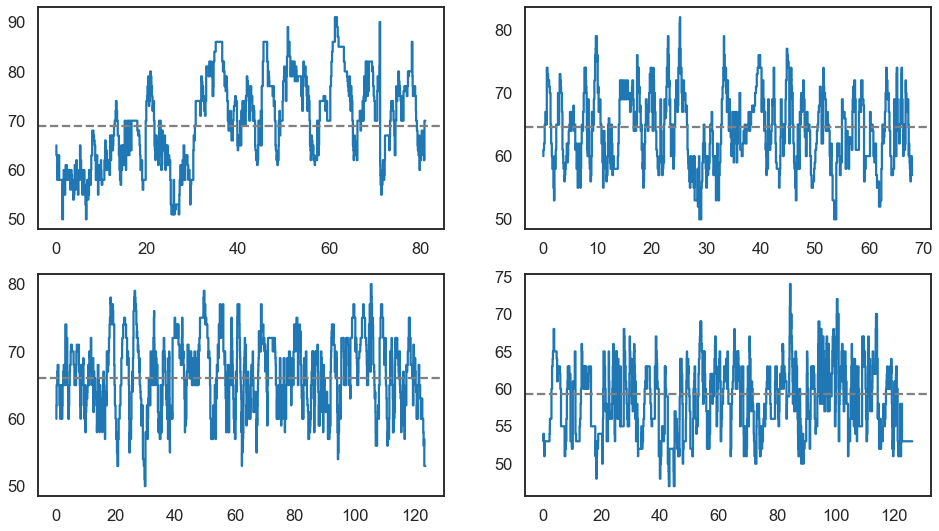

In [46]:
fig, axes = plt.subplots(2,2, figsize=(16,9))
axes = axes.flatten()

plot_melodic_profile(notelist(1), ax=axes[0], mean=True)
plot_melodic_profile(notelist(10), ax=axes[1], mean=True)
plot_melodic_profile(notelist(50), ax=axes[2], mean=True)
plot_melodic_profile(notelist(100), ax=axes[3], mean=True)

In [47]:
def standardize(notelist):
    """
    Takes a notelist as input and returns a standardized version.
    """
    
    notelist["Rel. MIDI Pitch"] = (notelist["pitch"] - notelist["pitch"].mean()) / notelist["pitch"].std()
    notelist["Rel. Duration"] = notelist["duration"] / notelist["duration"].sum()
    notelist["Rel. Onset"] = notelist["onset"] / notelist["onset"].max()
    
    return notelist

In [48]:
standardize(notelist(5))

,pitch,duration,onset,Rel. MIDI Pitch,Rel. Duration,Rel. Onset
2134,62.0,0.187755,0.187755,-0.485734,0.001194,0.001194
2135,63.0,0.261224,0.448980,-0.323822,0.001662,0.002856
2136,64.0,0.232200,0.681179,-0.161911,0.001477,0.004333
2137,60.0,0.092880,0.774059,-0.809556,0.000591,0.004923
2138,65.0,1.120363,1.894422,0.000000,0.007126,0.012050
...,...,...,...,...,...,...
2720,70.0,0.150000,156.117506,0.809556,0.000954,0.993003
2721,72.0,0.162245,156.279751,1.133378,0.001032,0.994035
2722,68.0,0.196939,156.476689,0.485734,0.001253,0.995288
2723,63.0,0.177551,156.654240,-0.323822,0.001129,0.996417


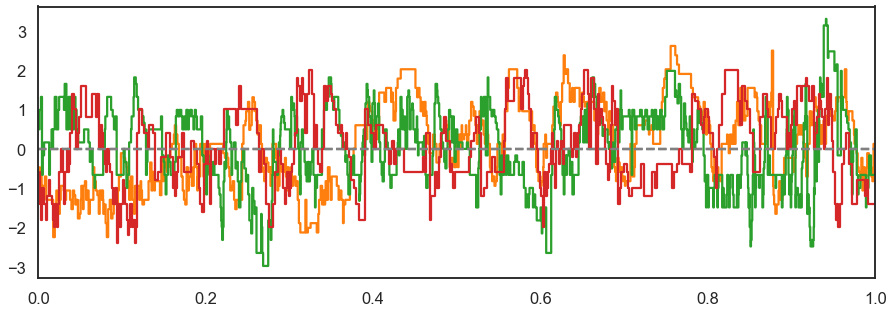

In [53]:
fig, ax = plt.subplots(figsize=(15,5))

for i in range(4):
    plot_melodic_profile(standardize(notelist(i)), 
                         mean=True, 
                         standardized=True)
plt.xlim(0,1)
plt.show()

In [80]:
big_df = pd.concat([standardize(notelist(i)) for i in range(solos_meta.shape[0])])

In [81]:
big_df.head()

,pitch,duration,onset,Rel. MIDI Pitch,Rel. Duration,Rel. Onset
0,65.0,0.138776,0.138776,-0.460594,0.001710,0.001710
1,63.0,0.171247,0.310023,-0.697714,0.002110,0.003820
2,58.0,0.081270,0.391293,-1.290513,0.001001,0.004822
3,61.0,0.235102,0.626395,-0.934833,0.002897,0.007719
4,63.0,0.130612,0.757007,-0.697714,0.001610,0.009329


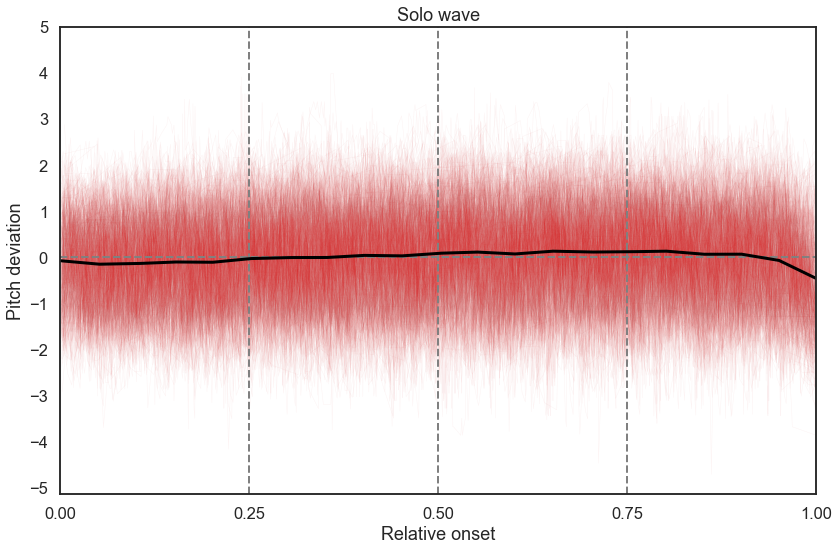

Wall time: 4.28 s


In [93]:
%%time

fig, ax = plt.subplots(figsize=(12,8))

for ID in range(solos_meta.shape[0]):
    solo = standardize(notelist(ID))
    x = solo["Rel. Onset"]
    y = solo["Rel. MIDI Pitch"]
    ax. plot(x,y, lw=.5, c="tab:red", alpha=.05)
        
ax.axvline(.25, lw=2, ls="--", c="gray")
ax.axvline(.5, lw=2, ls="--", c="gray")
ax.axvline(.75, lw=2, ls="--", c="gray")
ax.axhline(0, lw=2, ls="--", c="gray")

lowess = sm.nonparametric.lowess
big_x = big_df["Rel. Onset"]
big_y = big_df["Rel. MIDI Pitch"]
big_z = lowess(big_y, big_x, frac=1/10, delta=1/20)
ax.plot(big_z[:,0], big_z[:,1], c="black", lw=3)

plt.title("Solo wave")
plt.xlabel("Relative onset")
plt.ylabel("Pitch deviation")
plt.xticks(np.linspace(0,1,5))
plt.yticks(np.linspace(-5,5,11))
plt.xlim(0,1)

plt.tight_layout()
plt.savefig("img/jazz_melodic_arc.png")
plt.show()

## Pitch vs loudness

To facilitate the analyses later, we only keep the rows of the DataFrame where both the `pitch` and the `loud_med` columns have an entry (they are "not null").

In [15]:
solos = solos[solos.pitch.notnull() & solos.loud_med.notnull()]

A description of what these columns contain is stated on the website: https://jazzomat.hfm-weimar.de/dbformat/dbformat.html

We can now check how many solos the database contains.

### The "rain cloud" of Jazz solos

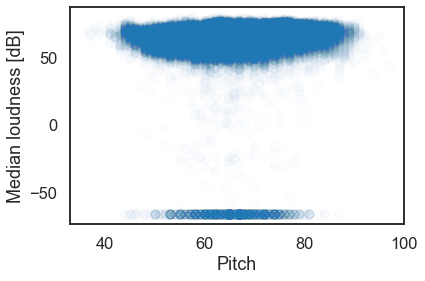

In [34]:
X = data[["pitch", "loud_med"]].values
x = X[:,0]
y = X[:,1]

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x,y, alpha=0.01)

plt.xlabel("Pitch")
plt.ylabel("Median loudness [dB]")
plt.show()

In [74]:
solos["melid"].max()

456

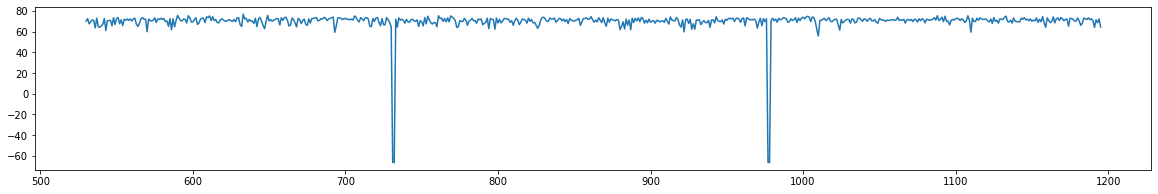

In [75]:
solos[ solos["melid"] == 2 ]["loud_med"].plot(figsize=(20,3));

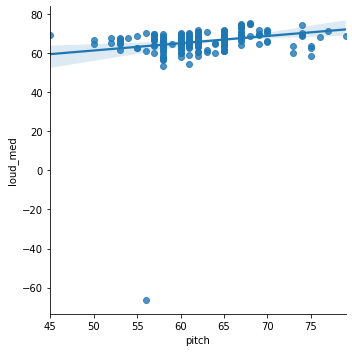

In [135]:
# fig, axes = plt.subplots(5,1, figsize=(15,20))

# for idx, rand in enumerate(np.random.randint(1,solos["melid"].unique().max(), 5)):
sns.lmplot(data=solos[ solos["melid"] == 130 ], x="pitch", y="loud_med");

In [16]:
grouped_df = solos.groupby("performer")

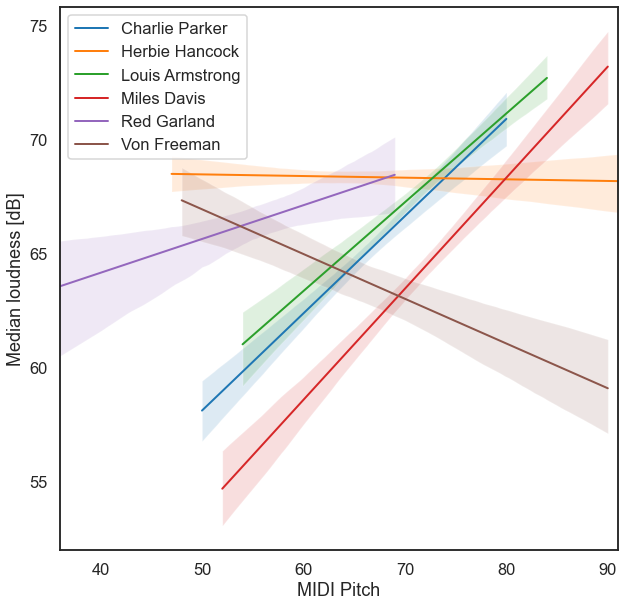

In [41]:
selected = ["Charlie Parker", "Miles Davis", "Louis Armstrong", "Herbie Hancock", "Von Freeman", "Red Garland"]

fig, ax = plt.subplots(figsize=(10,10))

for performer, df in grouped_df:
    if performer in selected:
        sns.regplot(
            data=df, 
            x="pitch", 
            y="loud_med", 
            x_jitter=.1, 
            y_jitter=.1, 
            scatter_kws={"alpha":.01, "color":"grey"}, 
            line_kws={"lw":2},
            label=performer,
            scatter=False,
            ax=ax
        )
        
plt.xlabel("MIDI Pitch")
plt.ylabel("Median loudness [dB]")
plt.legend()
plt.show()

**Observations:**

1. Most performers increase loudness with increasing pitch.
1. Charlie Parker (sax) and Louis Armstrong (t) show very similar patterns but Armstrong is generally higher.
1. Miles Davis (t) is similar to the two but plays generally softer than both.
1. Von Freeman (sax) strongly and Herbie Hancock (p) weakly decrease loudness with increasing pitch (almost all other performers show positive correlations).
1. Red Garland (p) plays generally lower than Herbie Hancock (p) but does show a positive correlation between pitch and loudness (NB: there is only one solo in the database).

Does this tell us something about performer styles or about instruments?